# <center>  Facebook Live sellers in Thailand

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------- sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
#-------------------------------------#


In [2]:
df=pd.read_csv('Live.csv')
print(df.shape)
df.head(2)

(7050, 16)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN


### EDA (Exploratory Data Analysis)
- Check for **Missing values** in dataset
- Check for **Categorical** and **Numeric** features
- Summary statistics for **Numeric** features
- Labeling  **Categorical** features

In [3]:
# check missing values
for i in df.columns:
    if df[i].isnull().any()==True: #check for columns with null values
        Missing=df[i].isnull().sum() # check number of null values in each column
        Miss_per=df[i].isnull().sum()/df.shape[0] # check number of null values percentage in each column
        print(i,Missing,Miss_per)

Column1 7050 1.0
Column2 7050 1.0
Column3 7050 1.0
Column4 7050 1.0


In [4]:
df=df.drop(["Column1","Column2","Column3","Column4"],axis=1)
print(df.shape)
df.head(2)

(7050, 12)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0


In [5]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i,len(df[i].unique()))

status_id 6997
status_type 4
status_published 6913


In [6]:
# droping  the unique identifier for each of the instances
df=df.drop(["status_id","status_published"],axis=1)

In [7]:
print(df.shape)
df.head(10)

(7050, 10)


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
5,photo,217,6,0,211,5,1,0,0,0
6,video,503,614,72,418,70,10,2,0,3
7,video,295,453,53,260,32,1,1,0,1
8,photo,203,1,0,198,5,0,0,0,0
9,photo,170,9,1,167,3,0,0,0,0


In [8]:
df_num=df.drop(["status_type"],axis=1)
df_cat=df["status_type"]

In [9]:
df_num.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


In [10]:
# scalling
scale=MinMaxScaler()
df_num=pd.DataFrame(scale.fit_transform(df_num),columns=df_num.columns)

In [11]:
df_num.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [12]:
df[df_num.columns]=df_num
df["status_type"]=df_cat
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,photo,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,video,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,photo,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,photo,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [13]:
df_num.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [14]:
Le=LabelEncoder()
df["status_type"]=Le.fit_transform(df["status_type"])
#or
# df["status_type"]=pd.get_dummies(df, columns=["status_type"])

In [15]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,3,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,1,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,1,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [101]:
#Kmeans
kmeans=KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_num)
print(kmeans.inertia_)

958.1492813930716


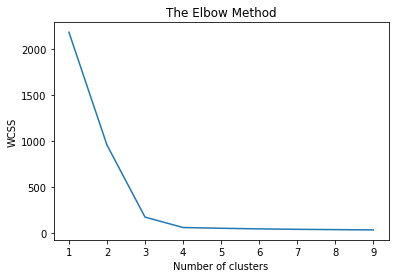

In [100]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df_num)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [102]:
#Kmeans
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_num)
print(kmeans.inertia_)

175.17345343975697


In [103]:
label=kmeans.predict(df_num)
df_num.head()
df_num['label']=label
df_num.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,label
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,1
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0


### Cluster ploting

In [105]:
label_0 = df_num[label == 0].drop(["label"],axis=1)
label_1 = df_num[label == 1].drop(["label"],axis=1)
label_2 = df_num[label == 2].drop(["label"],axis=1)
#label_3 = df_num[label == 3].drop(["label"],axis=1)

In [106]:
label_1

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.000000
6,0.106794,0.029252,0.021028,0.088747,0.106545,0.035971,0.012739,0.000000,0.096774
7,0.062633,0.021582,0.015479,0.055202,0.048706,0.003597,0.006369,0.000000,0.032258
14,0.073461,0.000524,0.000000,0.071125,0.015221,0.003597,0.000000,0.000000,0.000000
15,0.070488,0.004764,0.008762,0.064331,0.035008,0.003597,0.031847,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
6978,0.068790,0.213054,0.067757,0.059023,0.050228,0.017986,0.031847,0.058824,0.000000
6995,0.145435,0.000048,0.002044,0.143949,0.007610,0.003597,0.006369,0.000000,0.000000
7001,0.206582,0.002144,0.018400,0.202335,0.019787,0.021583,0.006369,0.000000,0.000000
7011,0.090446,0.001286,0.006133,0.085775,0.001522,0.000000,0.133758,0.000000,0.000000


Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')


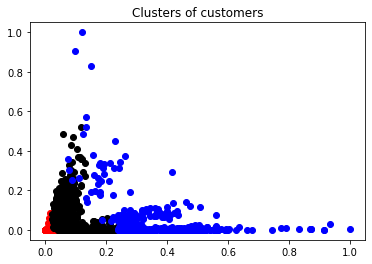

In [107]:
cols = label_0.columns
print(cols)
#num_reactions	num_comments
plt.scatter(label_0[cols[0]], label_0[cols[1]], color = 'red')
plt.scatter(label_1[cols[0]], label_1[cols[1]], color = 'black')
plt.scatter(label_2[cols[0]], label_2[cols[1]], color = 'blue')
#plt.scatter(label_3[cols[0]], label_3[cols[1]], color = 'brown')
#plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.show()

### Ploting clusters 
- https://koalatea.io/python-plot-kmeans-clusters/
- https://www.askpython.com/python/examples/plot-k-means-clusters-python
- https://www.datacamp.com/workspace/templates/recipe-python-k-means